In [1]:
# Paso 1: Configuración inicial
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ne_chunk, pos_tag

# Descargar recursos de NLTK necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

# Cargar el archivo .txt
with open('coursera.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xhuni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xhuni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xhuni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xhuni\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\xhuni\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\xhuni\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

In [2]:
# Paso 2: Tokenización
tokens = word_tokenize(texto.lower())

In [3]:
# Paso 3: Lematización y Stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
stemmed_words = [stemmer.stem(token) for token in tokens]

In [4]:
# Paso 4: Eliminación de palabras vacías
stop_words = set(stopwords.words('spanish'))  # Cambiar a 'english' si es en inglés
filtered_words = [word for word in lemmatized_words if word.isalnum() and word not in stop_words]

In [5]:
# Paso 5: Frecuencia de palabras
freq_dist = FreqDist(filtered_words)

In [6]:
# Paso 6: Análisis de sentimientos
sia = SentimentIntensityAnalyzer()
sentimientos = sia.polarity_scores(texto)

In [7]:
# Paso 7: Reconocimiento de entidades nombradas
entidades = ne_chunk(pos_tag(word_tokenize(texto)))

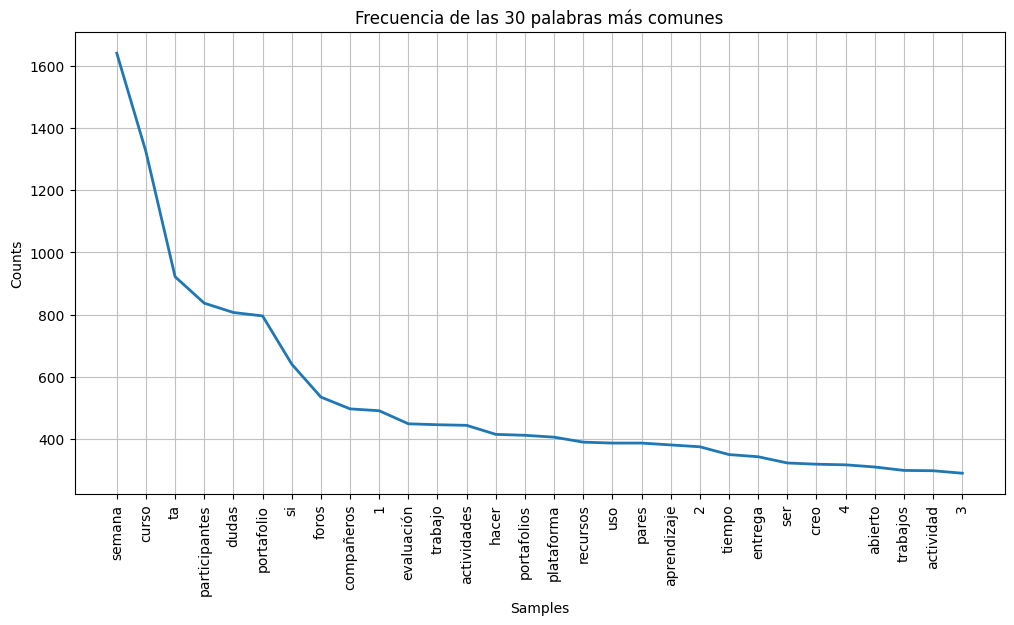

In [8]:
# Paso 8: Visualizaciones
# Gráfico de barras para la frecuencia de palabras
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.title('Frecuencia de las 30 palabras más comunes')
plt.show()

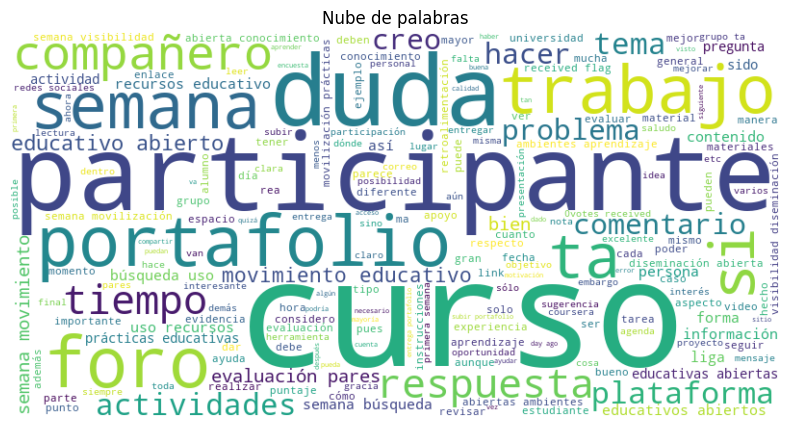

In [9]:
# Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras')
plt.show()

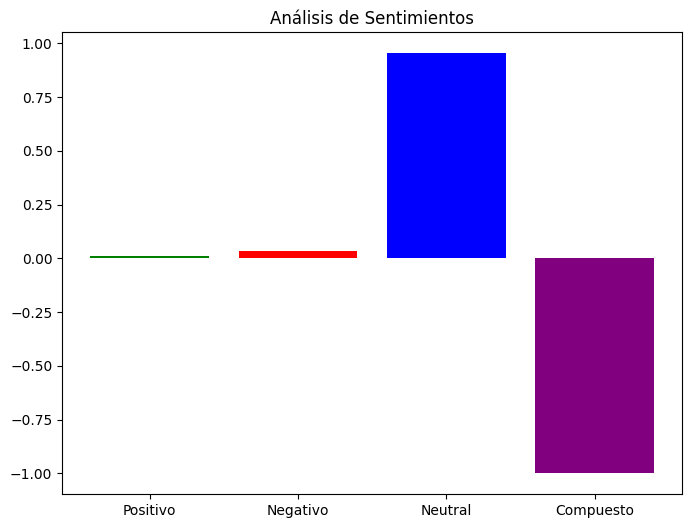

In [10]:
# Gráfico de sentimientos
labels = ['Positivo', 'Negativo', 'Neutral', 'Compuesto']
sizes = [sentimientos['pos'], sentimientos['neg'], sentimientos['neu'], sentimientos['compound']]
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['green', 'red', 'blue', 'purple'])
plt.title('Análisis de Sentimientos')
plt.show()

In [11]:
# Mostrar entidades nombradas extraídas
print("Entidades nombradas encontradas:")
for subtree in entidades:
    if hasattr(subtree, 'label'):
        print(subtree)


Entidades nombradas encontradas:
(PERSON Abril/NNP)
(PERSON Vargas/NNP Pérez/NNP)
(ORGANIZATION PT/NNP Valorada/NNP)
(PERSON Escandalizada/NNP)
(PERSON Estoy/NNP)
(ORGANIZATION Meta/NNP)
(PERSON Para/NNP)
(PERSON Coursera/NNP Plus/NNP)
(PERSON Duré/NNP)
(PERSON Quizás/NNP)
(PERSON Valorada/NNP)
(PERSON Fecha/NNP)
(PERSON Valorada/NNP)
(PERSON Fecha/NNP)
(PERSON Valorada/NNP)
(ORGANIZATION ESTAFADORES/NNP)
(PERSON Fecha/NNP)
(ORGANIZATION ES/NNP Valorada/NNP)
(ORGANIZATION ESTAFADORES/NNP)
(ORGANIZATION ESTAFADORES/NNP)
(PERSON Mismo/NNP)
(PERSON Fecha/NNP)
(PERSON Maria/NNP Eugenia/NNP Simancas/NNP Soriano/NNP)
(ORGANIZATION US/NNP Valorada/NNP)
(PERSON Cuidado/NNP)
(PERSON Son/NNP)
(PERSON Además/NNP)
(PERSON Fecha/NNP)
(ORGANIZATION US/NNP Valorada/NNP)
(PERSON Creo/NNP)
(PERSON Courser/NNP Learner/NNP)
(PERSON Curso/NNP)
(GPE Universidad/NNP)
(PERSON Fecha/NNP)
(PERSON Valorada/NNP)
(PERSON Leí/NNP)
(GPE Coursera/NNP)
(PERSON Fecha/NNP)
(PERSON Jeanpierre/NNP Nuñez/NNP)
(PERSON Valo